In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
PATH = Path().parent
DDIR = PATH / 'dataset'

In [3]:
def missing(df):
    missing = df.isnull().sum()
    percent = round(100*(missing/df.shape[0]),2)
    types = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"missing":missing,
                        "percent_missing":percent,
                        "types":types,
                        "n_unique":n_unique}).sort_values("percent_missing",ascending=False)

In [4]:
train = pd.read_csv(DDIR / 'train.csv')
test = pd.read_csv(DDIR / 'test.csv')

In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
hash = {
    False:0,
    True:1
}

In [7]:
train['CryoSleep'] = train['CryoSleep'].replace(hash)
train['Transported'] = train['Transported'].replace(hash)
train['VIP'] = train['VIP'].replace(hash)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   float64
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   float64
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 950.9+ KB


In [9]:
train.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8476.000000,8514.000000,8490.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,0.358306,28.827930,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,0.479531,14.489021,0.151303,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [10]:
train.describe(include=['object']).T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
Name,8493,8473,Gollux Reedall,2


In [11]:
missing(train)

,missing,percent_missing,types,n_unique
CryoSleep,217,2.50,float64,2
ShoppingMall,208,2.39,float64,1115
VIP,203,2.34,float64,2
HomePlanet,201,2.31,object,3
Name,200,2.30,object,8473
Cabin,199,2.29,object,6560
VRDeck,188,2.16,float64,1306
FoodCourt,183,2.11,float64,1507
Spa,183,2.11,float64,1327
Destination,182,2.09,object,3


In [12]:
train.drop(['PassengerId'],axis=1, inplace=True)

In [13]:
columns_with_missing_num = []
columns_with_missing_obj = []
for col in train.columns:
    if train[col].isnull().sum() > 0:
        if train[col].dtype == 'object':
            columns_with_missing_obj.append(col)
        else:
            columns_with_missing_num.append(col)

In [14]:
for col in columns_with_missing_num:
    train = train.drop([x for x in train[train[col].isnull()].index],axis=0)

In [15]:
for col in columns_with_missing_obj:
    train = train.drop([x for x in train[train[col].isnull()].index],axis=0)

In [16]:
missing(train)

,missing,percent_missing,types,n_unique
HomePlanet,0,0.0,object,3
CryoSleep,0,0.0,float64,2
Cabin,0,0.0,object,5305
Destination,0,0.0,object,3
Age,0,0.0,float64,80
VIP,0,0.0,float64,2
RoomService,0,0.0,float64,1093
FoodCourt,0,0.0,float64,1293
ShoppingMall,0,0.0,float64,984
Spa,0,0.0,float64,1143


In [17]:
train.drop(columns=['Name'], inplace=True)

c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


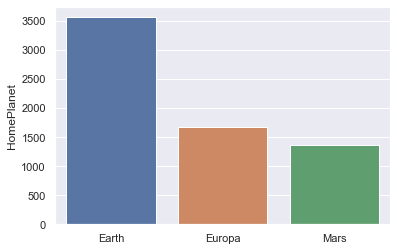

In [18]:
sns.set()
sns.barplot(train['HomePlanet'].value_counts().index, train['HomePlanet'].value_counts())
plt.show()

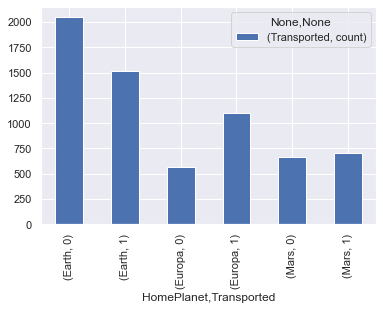

In [19]:
data_homeplanet = train.groupby(['HomePlanet','Transported'])[['Transported']].agg(['count']).plot.bar()
# display(data_homeplanet)

From the barplot, Earth not-Transported rate is lower than the Transported rate (around ~500). But, the other HomePlanet (Europa and Mars) is different. They has higher Transported rate than not-Transported. How can that happen? let's see other data.

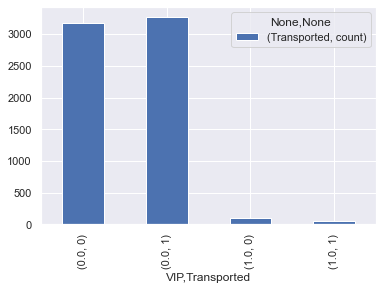

In [20]:
data_vip = train.groupby(['VIP','Transported'])[['Transported']].agg(['count']).plot.bar()

From the barplot, we can see that VIP and non-VIP has almost no difference. It means VIP doesn't mean that person will be transported or no. We can say that this feature is not that important / doesn't give much correlation to the data.

In [21]:
data_age = train.groupby(['Age','Transported'])[['Transported']].agg(['count'])
data_age


Transported
                       count
Age  Transported            
0.0  0                    24
     1                   116
1.0  0                    13
     1                    41
2.0  0                    17
...                      ...
76.0 1                     1
77.0 1                     1
78.0 0                     2
     1                     1
79.0 0                     2

[157 rows x 1 columns]

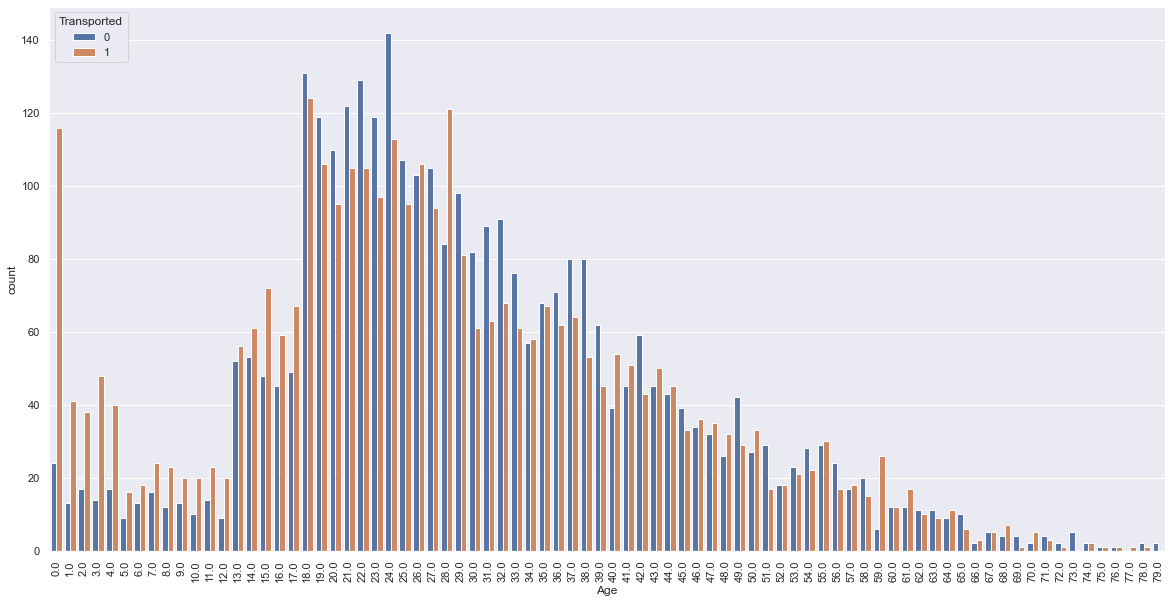

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x=train['Age'],hue=train['Transported'])
plt.xticks(rotation=90)
plt.show()

It seems like children (0-17) have high schance to be Transported. Meanwhile adults (18-so on) almost have 50% Chance to be transported. We can take a hypothesis that this spaceship prioritize children more than adults.

In [23]:
data_destinatioin = train.groupby(['Destination','Transported'])[['Transported']].agg(['count'])
data_destinatioin

Transported
                                count
Destination   Transported            
55 Cancri e   0                   531
              1                   876
PSO J318.5-22 0                   308
              1                   315
TRAPPIST-1e   0                  2440
              1                  2136

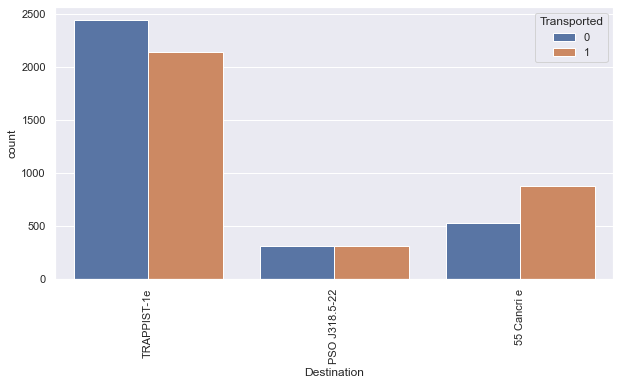

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Destination'],hue=train['Transported'])
plt.xticks(rotation=90)
plt.show()

Hmmm.. passanger with TRAPPIST as a destination have lower percentage of being Transported. Meanwhile PSO have almost 50%. But, Cancri does have higher percentage transported.

In [25]:
train['Total_bill'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']

In [26]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_bill
0,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,736.0
2,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,10383.0
3,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0
4,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,1091.0


In [27]:
data_bill = train.groupby(['Total_bill','Transported'])[['Transported']].agg(['count'])

In [28]:
data_bill.sort_values(by=('Transported','count'),ascending=False)

Transported
                             count
Total_bill Transported            
0.0        1                  2153
           0                   583
809.0      0                    34
788.0      0                    26
804.0      0                    26
...                            ...
1798.0     1                     1
           0                     1
1797.0     1                     1
1795.0     1                     1
35987.0    0                     1

[2287 rows x 1 columns]

It looks like passanger that spends nothing on the ship got HUGE percentage of being Transported, which mean...  this spaceship doesn't rob their passanger money to get Transported.. strange..

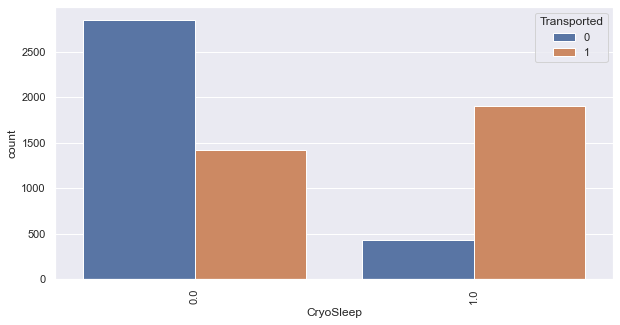

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['CryoSleep'],hue=train['Transported'])
plt.xticks(rotation=90)
plt.show()

WOW! CryoSleep True value got higher percentage of being Transported. This means that if the passanger didn't get CryoSleep, he most likely will not get Transported, and vice versa. this is a important feature.

In [30]:
train.corr(method='pearson')

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_bill
CryoSleep,1.000000,-0.085701,-0.082303,-0.255398,-0.210782,-0.228612,-0.202216,-0.199095,0.462803,-0.386646
Age,-0.085701,1.000000,0.098138,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553,0.196001
VIP,-0.082303,0.098138,1.000000,0.029009,0.135386,0.013660,0.064792,0.130061,-0.042260,0.165895
RoomService,-0.255398,0.074783,0.029009,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291,0.224410
FoodCourt,-0.210782,0.135844,0.135386,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025,0.753124
ShoppingMall,-0.228612,0.042314,0.013660,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602,0.216893
Spa,-0.202216,0.123820,0.064792,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854,0.592827
VRDeck,-0.199095,0.105031,0.130061,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950,0.575334
Transported,0.462803,-0.082553,-0.042260,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000,-0.190992
Total_bill,-0.386646,0.196001,0.165895,0.224410,0.753124,0.216893,0.592827,0.575334,-0.190992,1.000000


In [31]:
train['Cabin'] = train['Cabin'].apply(lambda x: x[0])

In [32]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_bill
0,Europa,0.0,B,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,Earth,0.0,F,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,736.0
2,Europa,0.0,A,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,10383.0
3,Europa,0.0,A,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0
4,Earth,0.0,F,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,1091.0


In [33]:
data_cabin = train.groupby(['Cabin','Transported'])[['Transported']].agg(['count'])
train.drop([x for x in train[train['Cabin']=='T'].index],axis=0,inplace=True)

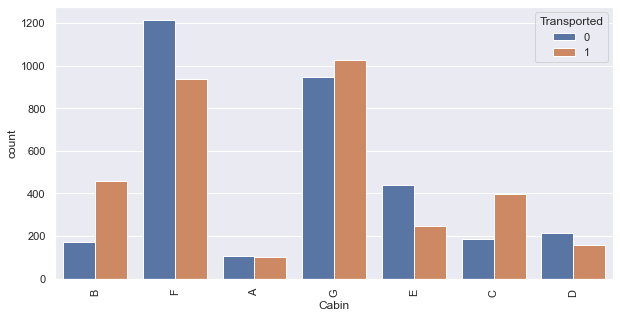

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Cabin'],hue=train['Transported'])
plt.xticks(rotation=90)
plt.show()

In [35]:
def make_onehot(df:pd.DataFrame,col):
    dummies = pd.get_dummies(df[col],prefix=col,prefix_sep='_')
    df = pd.concat([df,dummies],axis=1)
    df.drop(col,axis=1,inplace=True)
    return df

In [36]:
train = make_onehot(train,'Cabin')

In [37]:
train = make_onehot(train, 'Destination')

In [38]:
train = make_onehot(train, 'HomePlanet')

In [39]:
train.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_bill'],axis=1,inplace=True)

In [40]:
train.head()

,CryoSleep,Age,VIP,Transported,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0.0,39.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,0.0,24.0,0.0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
2,0.0,58.0,1.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0.0,33.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,0.0,16.0,0.0,1,0,0,0,0,0,1,0,0,0,1,1,0,0


In [41]:
from sklearn.model_selection import train_test_split as tts

In [42]:
X_train,X_test,y_train,y_test = tts(train.drop(['Transported'],axis=1),train['Transported'],test_size=0.2,random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [44]:
rfs = RandomForestClassifier(n_estimators=100,random_state=42)

In [45]:
rfs.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [46]:
predictions = rfs.predict(X_test)

In [47]:
print(accuracy_score(y_test,predictions))

0.7274791824375473


OK this is kinda low. There's something we need to change about our data then!

In [48]:
from pycaret.classification import *

In [60]:
train_data = pd.read_csv(DDIR / 'train.csv')

In [61]:
train_data = train_data.drop([x for x in train_data[train_data['Cabin'].isnull()].index],axis=0)

# train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)
# train_data.drop(['Cabin'],axis=1,inplace=True)

# test[["Deck", "Cabin_num", "Side"]] = test["Cabin"].str.split("/", expand=True)
# test.drop(['Cabin'],axis=1,inplace=True)

In [62]:
s = setup(train_data, target='Transported', categorical_features=['HomePlanet','Destination','Cabin'], numeric_features=['Age','FoodCourt','CryoSleep','Spa','VRDeck','ShoppingMall','RoomService'], ignore_features=['PassengerId','Name','VIP'], fix_imbalance=True)

In [63]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:39:06
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [64]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [66]:
result = pull()
result

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8010,0.8762,0.8136,0.7962,0.8047,0.6019,0.6023,0.204
gbc,Gradient Boosting Classifier,0.7950,0.8785,0.8267,0.7801,0.8024,0.5897,0.5912,0.250
xgboost,Extreme Gradient Boosting,0.7929,0.8695,0.7963,0.7935,0.7948,0.5858,0.5860,0.213
ada,Ada Boost Classifier,0.7921,0.8717,0.8180,0.7804,0.7986,0.5840,0.5850,0.183
lr,Logistic Regression,0.7884,0.8728,0.7929,0.7885,0.7905,0.5767,0.5770,0.117
rf,Random Forest Classifier,0.7869,0.8551,0.7659,0.8023,0.7835,0.5739,0.5747,0.349
et,Extra Trees Classifier,0.7803,0.8449,0.7542,0.7990,0.7758,0.5608,0.5619,0.307
knn,K Neighbors Classifier,0.7738,0.8374,0.7749,0.7763,0.7752,0.5475,0.5481,0.146
ridge,Ridge Classifier,0.7670,0.0000,0.7054,0.8079,0.7530,0.5345,0.5391,0.078
lda,Linear Discriminant Analysis,0.7670,0.8551,0.7054,0.8079,0.7530,0.5345,0.5391,0.101


In [55]:
predictions = predict_model(best, data=test)

In [56]:
predictions.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Cabin_num,Side,prediction_label,prediction_score
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,1,0.7183
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,0,0.9955
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,1,0.9972
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,1,0.9982
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,1,0.6501


In [57]:
prediction_df = predictions[['PassengerId','prediction_label']]
prediction_df.rename(columns={'prediction_label':'Transported'},inplace=True)
prediction_df['Transported']= prediction_df['Transported'].replace({0:False,1:True})

In [58]:
prediction_df.to_csv(f'submission.csv',index=False)

In [59]:
save_model(best, f'{PATH}/spaceship-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\pande\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'FoodCourt', 'CryoSleep',
                                              'Spa', 'VRDeck', 'ShoppingMall',
                                              'RoomService'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='m...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytr